In [0]:
from pyspark.sql.functions import col, unix_timestamp, from_unixtime, udf
from pyspark.sql.types import DateType, TimestampType

In [0]:
df = spark.read.json('/mnt/dacoursedatabricksstg/dacoursedatabricksdata/busFile')

In [0]:
df = df.drop("direction", "poiId", "poiId2", "probability", "loc")\
               .withColumn("id", col("_id.$oid"))\
               .withColumn("calendar", col("calendar.$numberLong").cast("bigint"))\
               .withColumn("timestamp", col("timestamp.$numberLong").cast("bigint"))\
               .withColumn("congestion", col("congestion").cast("integer"))\
               .drop("_id")\
               .drop("anomaly")\
               .drop("dateTypeEnum")

In [0]:
df_t = df.withColumn("timestamp", col("timestamp")/1000)
display(df_t)

actualDelay,angle,areaId,areaId1,areaId2,areaId3,atStop,busStop,calendar,congestion,currentHour,dateType,delay,distanceCovered,ellapsedTime,filteredActualDelay,gridID,journeyPatternId,justLeftStop,justStopped,latitude,lineId,longitude,systemTimestamp,timestamp,vehicleId,vehicleSpeed,id
0,45.0,15001,14,234,3750,false,2377,1499079397000000,0,23,1,-2,0.22027568625824304,21000,0,"132,86",00271001,false,false,53.315958,27,-6.334248,6.15949535E8,1.499079397E9,44087,0,595a2300e45b4b2ea81ae778
-25,225.0,15138,14,236,3784,false,2485,1499079397000000,0,23,1,-104,0.16586637987086802,18000,0,"146,88",00181001,false,false,53.319117,18,-6.290017,6.15949538E8,1.499079397E9,33467,0,595a2300e45b4b2ea81ae779
0,225.0,18342,17,286,4585,false,113,1499079397000000,0,23,1,124,0.048167532049173775,23000,0,"155,131",00130002,true,false,53.395714,13,-6.26408,6.1594954E8,1.499079397E9,43041,0,595a2300e45b4b2ea81ae77a
0,225.0,3062,11,191,3062,false,7239,1499079397000000,0,23,1,-147,0.23610840881390818,24000,0,"120,107",025B0002,false,false,53.353845,25,-6.367692,6.15949542E8,1.499079397E9,33401,0,595a2300e45b4b2ea81ae77b
0,45.0,15536,14,242,3883,false,779,1499079397000000,0,23,1,-423,0.0758441143128766,24000,0,"160,93",00180001,true,false,53.327876,18,-6.248047,6.15949544E8,1.499079397E9,33464,0,595a2300e45b4b2ea81ae77c
-22,45.0,73060,17,285,4565,false,404,1499079397000000,0,23,1,61,0.08946480481101295,22000,0,"157,103",00110001,false,false,53.345593,11,-6.257684,6.15949546E8,1.499079397E9,44110,0,595a2300e45b4b2ea81ae77d
0,45.0,73060,17,285,4565,false,1278,1499079397000000,0,23,1,194,0.03299085710397742,24000,0,"157,103",01231001,true,false,53.346069,123,-6.257612,6.15949547E8,1.499079397E9,44103,0,595a2300e45b4b2ea81ae77e
-25,45.0,15646,14,244,3911,false,2007,1499079397000000,0,23,1,-373,0.448449642683063,30000,0,"170,83",046A0001,false,false,53.310553,46A,-6.21956,6.15949549E8,1.499079397E9,36013,0,595a2300e45b4b2ea81ae77f
0,45.0,1164,17,290,1164,false,4906,1499079397000000,0,23,1,12,0.1615753977654222,22000,0,"162,166",00411001,false,false,53.459475,41,-6.242159,6.15949551E8,1.499079397E9,33336,0,595a2300e45b4b2ea81ae780
20,-2.0,18309,17,285,4577,true,510,1499079397000000,0,23,1,87,0.0,19000,0,"161,110",01231001,false,false,53.359226,123,-6.245823,6.15949553E8,1.499079397E9,44107,0,595a2300e45b4b2ea81ae781


In [0]:
df_t = df_t.withColumn("date_timestamp", col("timestamp").cast(TimestampType()))

In [0]:
true_values = df_t.filter(col("congestion") == True)
sample = df_t.filter(col("congestion") == False).sample(withReplacement=False, fraction=0.001)
balanced_data = true_values.union(sample)

In [0]:
from pyspark.sql import functions as F
only_coordinates_n_areaID = balanced_data.select(['areaId2','latitude','longitude'])
aggs = balanced_data.groupBy("areaId2").agg({'latitude':'min', 'latitude':'max', 'longitude':'min','longitude':'max'})
#aggs.write.saveAsTable("areaId2_aggs")

In [0]:
aggs_max = aggs

In [0]:
aggs_max.write.saveAsTable("aggs_traffic_max")

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 62 try : 
 ---> 63 return f ( * a , ** kw ) 
 64 except py4j . protocol . Py4JJavaError as e : 

 /databricks/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 --> 328 format(target_id, ".", name), value)
 329 else : 

 Py4JJavaError : An error occurred while calling o17945.saveAsTable.
: org.apache.spark.sql.AnalysisException: Attribute name "max(latitude)" contains invalid character(s) among " ,;{}()\n\t=". Please use alias to rename it.;
	at org.apache.spark.sql.execution.datasources.parquet.ParquetSchemaConverter$.checkConversionRequirement(ParquetSchemaConverter.scala:582)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetSchemaConverter$.checkFieldName(ParquetSchemaConverter.scala:569)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetSchemaConverter$$anonfun$checkFieldNames$1.apply(ParquetSchemaConverter.scala:577)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetSchemaConverter$$anonfun$checkFieldNames$1.apply(ParquetSchemaConverter.scala:577)
	at scala.collection.IndexedSeqOptimized$class.foreach(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:35)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetSchemaConverter$.checkFieldNames(ParquetSchemaConverter.scala:577)
	at org.apache.spark.sql.execution.command.DDLUtils$$anonfun$checkDataColNames$1.apply(ddl.scala:945)
	at org.apache.spark.sql.execution.command.DDLUtils$$anonfun$checkDataColNames$1.apply(ddl.scala:936)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.sql.execution.command.DDLUtils$.checkDataColNames(ddl.scala:935)
	at org.apache.spark.sql.execution.command.DDLUtils$.checkDataColNames(ddl.scala:931)
	at org.apache.spark.sql.execution.datasources.DataSourceAnalysis$$anonfun$apply$1.applyOrElse(DataSourceStrategy.scala:143)
	at org.apache.spark.sql.execution.datasources.DataSourceAnalysis$$anonfun$apply$1.applyOrElse(DataSourceStrategy.scala:136)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$$anonfun$resolveOperatorsDown$1$$anonfun$4.apply(AnalysisHelper.scala:112)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$$anonfun$resolveOperatorsDown$1$$anonfun$4.apply(AnalysisHelper.scala:112)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:76)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$$anonfun$resolveOperatorsDown$1.apply(AnalysisHelper.scala:111)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$$anonfun$resolveOperatorsDown$1.apply(AnalysisHelper.scala:110)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$.allowInvokingTransformsInAnalyzer(AnalysisHelper.scala:198)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$class.resolveOperatorsDown(AnalysisHelper.scala:110)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.resolveOperatorsDown(LogicalPlan.scala:29)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$class.resolveOperators(AnalysisHelper.scala:73)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.resolveOperators(LogicalPlan.scala:29)
	at org.apache.spark.sql.execution.datasources.DataSourceAnalysis.apply(DataSourceStrategy.scala:136)
	at org.apache.spark.sql.execution.datasources.DataSourceAnalysis.apply(DataSourceStrategy.scala:54)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor$$anonfun$execute$1$$anonfun$apply$1.apply(RuleExecutor.scala:112)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor$$anonfun$execute$1$$anonfun$apply$1.apply(RuleExecutor.scala:109)
	at scala.collection.LinearSeqOptimized$class.foldLeft(LinearSeqOptimized.scala:124)
	at scala.collection.immutable

In [0]:
aggs_min = balanced_data.groupBy("areaId2").agg({'latitude':'min', 'longitude':'min'})

In [0]:
display(aggs_max)

areaId2,max(latitude),max(longitude)
26,53.338211,-6.547389
191,53.37217,-6.335225
270,53.270717,-6.114399
278,53.405962,-6.29993
243,53.304575,-6.194067
287,53.37217,-6.194069
277,53.372158,-6.299932
241,53.304558,-6.229367
237,53.223848,-6.2395
22,53.160437,-6.549186


In [0]:
display(aggs_min)

areaId2,min(latitude),min(longitude)
26,53.334379,-6.558918
191,53.338377,-6.370487
270,53.237049,-6.123408
243,53.270876,-6.229353
278,53.37218,-6.335154
277,53.338377,-6.335205
287,53.338412,-6.229351
241,53.271467,-6.264626
237,53.22351,-6.240283
22,53.136247,-6.566502


In [0]:
aggs_min.write.save("trafficaggsmin")

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 62 try : 
 ---> 63 return f ( * a , ** kw ) 
 64 except py4j . protocol . Py4JJavaError as e : 

 /databricks/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 --> 328 format(target_id, ".", name), value)
 329 else : 

 Py4JJavaError : An error occurred while calling o18374.save.
: org.apache.spark.sql.AnalysisException: Attribute name "min(latitude)" contains invalid character(s) among " ,;{}()\n\t=". Please use alias to rename it.;
	at org.apache.spark.sql.execution.datasources.parquet.ParquetSchemaConverter$.checkConversionRequirement(ParquetSchemaConverter.scala:582)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetSchemaConverter$.checkFieldName(ParquetSchemaConverter.scala:569)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetWriteSupport$$anonfun$setSchema$2.apply(ParquetWriteSupport.scala:444)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetWriteSupport$$anonfun$setSchema$2.apply(ParquetWriteSupport.scala:444)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetWriteSupport$.setSchema(ParquetWriteSupport.scala:444)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.prepareWrite(ParquetFileFormat.scala:119)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:107)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:192)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:108)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:106)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.doExecute(commands.scala:126)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:140)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$5.apply(SparkPlan.scala:193)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:189)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:140)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:117)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:115)
	at org.apache.spark.sql.DataFrameWriter$$anonfun$runCommand$1.apply(DataFrameWriter.scala:711)
	at org.apache.spark.sql.DataFrameWriter$$anonfun$runCommand$1.apply(DataFrameWriter.scala:711)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withCustomExecutionEnv$1.apply(SQLExecution.scala:113)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:243)
	at org.apache.spark.sql.execution.SQLExecution$.withCustomExecutionEnv(SQLExecution.scala:99)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:173)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:711)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:307)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:293)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:235)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at p

In [0]:
# This is how we pulled out quantiles for our custom grids:
"""long_quantiles_to_25 = df.approxQuantile("longitude", [0.05,0.1,0.15,0.2,0.25], 0.1)
lat_queantiles_to_25 = df.approxQuantile("latitude", [0.05,0.1,0.15,0.2,0.25], 0.1)
long_quantiles_to_75 = df.approxQuantile("longitude", [0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75], 0.1)
lat_queantiles_to_75 = df.approxQuantile("latitude", [0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75], 0.1)
long_quantiles_to_95 = df.approxQuantile("longitude", [0.75,0.8,0.85,0.9,0.95], 0.1)
lat_queantiles_to_95 = df.approxQuantile("latitude", [0.75,0.8,0.85,0.9,0.95], 0.1)
"""
# We ran it in different notebook and got our results (the lists there appear inside our udf)

def _make_ourgridID(long, lat):
  if not long:
    return 0
  long_quants = [-6.614917, -6.614917, -6.275221, -6.275221, -6.275221, -6.263203, -6.263203, -6.2602, -6.2602, -6.239203, -6.239203,
                  -6.239203, -6.239203, -6.174597, -6.174597, -6.22105, -6.113757, -6.113757, -6.053217, -6.053217]
  lat_quants = [53.071273, 53.071273, 53.342162, 53.3422, 53.3422, 53.344047, 53.344047, 53.347444, 53.347444, 53.347444, 53.360418,
                 53.360418, 53.360418, 53.397197, 53.397197, 53.394505, 53.394505, 53.560932, 53.606445, 53.606445]
  long_not_set = True
  lat_not_set = True
  grid_id = 0 
  for i in range(1,21):
    if long_not_set and float(long)<=long_quants[i-1]:
      grid_id += i
      long_not_set = False
    if lat_not_set and float(lat)<=lat_quants[i-1]:
      grid_id += 100*i
      lat_not_set = False
  if long_not_set:
    grid_id += 21
  if lat_not_set:
    grid_id += 2100
  return grid_id

make_ourgridID = udf(_make_ourgridID)

balanced_data = balanced_data.withColumn("our_gridID",make_ourgridID("longitude","latitude"))

In [0]:
trafic_lights = spark.read.option("inferSchema", True).option("header", True).csv('/FileStore/tables/dcc_traffic_lights_locations__its_sites_aug_2020__1_.csv')

In [0]:
trafic_lights = trafic_lights.where(col("Long")!='NULL')
display(trafic_lights)

SiteID,Site_Description_Cap,Site_Description_Lower,Region,Lat,Long
1,ABBEY ST @ MARLBOROUGH ST (LUAS),abbey st @ marlborough st (luas),CCITY,53.348756,-6.257608
2,AMIENS ST @ SEVILLE PL,amiens st @ seville pl,CCITY,53.354711,-6.246679
3,AMIENS ST @ TALBOT ST,amiens st @ talbot st,CCITY,53.351374,-6.250073
4,ANNESLEY PL @ POPLAR ROW,annesley pl @ poplar row,NCITY,53.361145,-6.240513
5,NCR @ AUGHRIM ST,ncr @ aughrim st,WCITY1,53.355797,-6.292406
6,BAGGOT ST BRIDGE,baggot st bridge,SCITY,53.334055,-6.245199
7,BAGGOT ST @ FITZWILLIAM ST,baggot st @ fitzwilliam st,SCITY,53.336815,-6.249116
8,BAGGOT ST @ WATERLOO RD,baggot st @ waterloo rd,SCITY,53.333171,-6.243319
9,BALLYBOUGH RD @ CLONLIFFE RD (LUKE KELLY BR),ballybough rd @ clonliffe rd (luke kelly br),NCITY,53.361367,-6.242793
10,BALLINTEER@WYCKHAM/WOODPARK &THE HEIGHTS(P523),ballinteer@wyckham/woodpark &the heights(p523),IRE,53.27298881,-6.243635717


In [0]:
lights_with_our_grid = trafic_lights.select('Lat','Long').withColumn("our_gridID",make_ourgridID("Long","Lat"))
lights_grid_agged = lights_with_our_grid.groupBy("our_gridID").count().withColumn("gridTrafficLightsAmount",col("count"))
display(lights_grid_agged)

our_gridID,count,gridTrafficLightsAmount
317,71,71
308,10,10
310,71,71
1814,21,21
808,4,4
610,6,6
1106,21,21
614,2,2
1108,9,9
1114,22,22


In [0]:
df_with_tl_amounts = balanced_data.join(lights_grid_agged,lights_grid_agged.our_gridID == balanced_data.our_gridID,how='left')
display(df_with_tl_amounts)

actualDelay,angle,areaId,areaId1,areaId2,areaId3,atStop,busStop,calendar,congestion,currentHour,dateType,delay,distanceCovered,ellapsedTime,filteredActualDelay,gridID,journeyPatternId,justLeftStop,justStopped,latitude,lineId,longitude,systemTimestamp,timestamp,vehicleId,vehicleSpeed,id,date_timestamp,hourRounded,hourRounded,msl,vis,rain,vappr,temp,rhum,dewpt,wetb,our_gridID,our_gridID,count,gridTrafficLightsAmount
0,0.0,73079,17,285,4567,false,7385,1499079414000000,1,4,0,488,0.0,0,0,"159,99",00671002,false,false,53.339512,67,-6.251453,6.15957784E8,1.499079414E9,44002,0,595a2308e45b4b2ea81ae847,2017-07-03T10:56:54.000+0000,2017-07-03 10,2017-07-03 10,1020.2666666666668,35000.0,0.0,12.733333333333334,15.033333333333333,74.33333333333333,10.533333333333333,12.666666666666666,310,310,71,71
0,0.0,73060,17,285,4565,false,328,1499079416000000,1,4,0,-53,0.0,0,0,"158,103",039A0001,false,false,53.3455,39,-6.256151,6.15957833E8,1.499079416E9,36051,0,595a2308e45b4b2ea81ae881,2017-07-03T10:56:56.000+0000,2017-07-03 10,2017-07-03 10,1020.2666666666668,35000.0,0.0,12.733333333333334,15.033333333333333,74.33333333333333,10.533333333333333,12.666666666666666,810,810,18,18
0,0.0,15146,14,236,3786,false,1367,1499079416000000,1,4,0,148,0.0,0,0,"144,97",00171001,false,false,53.335686,17,-6.296428,6.1595784E8,1.499079416E9,33524,0,595a2308e45b4b2ea81ae88a,2017-07-03T10:56:56.000+0000,2017-07-03 10,2017-07-03 10,1020.2666666666668,35000.0,0.0,12.733333333333334,15.033333333333333,74.33333333333333,10.533333333333333,12.666666666666666,303,303,86,86
0,0.0,4238,16,264,4238,false,5046,1499079419000000,1,5,0,358,0.0,0,0,"199,49",00070006,false,false,53.248239,7,-6.132657,6.15965628E8,1.499079419E9,38097,0,595a2310e45b4b2ea81ae8e6,2017-07-03T10:56:59.000+0000,2017-07-03 10,2017-07-03 10,1020.2666666666668,35000.0,0.0,12.733333333333334,15.033333333333333,74.33333333333333,10.533333333333333,12.666666666666666,317,317,71,71
20,-2.0,73079,17,285,4567,false,7385,1499079425000000,1,7,0,508,0.0,11000,0,"159,99",00671002,false,false,53.339512,67,-6.251453,6.15965889E8,1.499079425E9,44002,0,595a2310e45b4b2ea81ae989,2017-07-03T10:57:05.000+0000,2017-07-03 10,2017-07-03 10,1020.2666666666668,35000.0,0.0,12.733333333333334,15.033333333333333,74.33333333333333,10.533333333333333,12.666666666666666,310,310,71,71
20,-2.0,15146,14,236,3786,false,1367,1499079427000000,1,7,0,168,0.0,11000,0,"144,97",00171001,false,false,53.335686,17,-6.296428,6.1596963E8,1.499079427E9,33524,0,595a2314e45b4b2ea81aea06,2017-07-03T10:57:07.000+0000,2017-07-03 10,2017-07-03 10,1020.2666666666668,35000.0,0.0,12.733333333333334,15.033333333333333,74.33333333333333,10.533333333333333,12.666666666666666,303,303,86,86
20,-2.0,4238,16,264,4238,false,5046,1499079430000000,1,8,0,378,0.0,11000,0,"199,49",00070006,false,false,53.248239,7,-6.132657,6.15977631E8,1.49907943E9,38097,0,595a231ce45b4b2ea81aea65,2017-07-03T10:57:10.000+0000,2017-07-03 10,2017-07-03 10,1020.2666666666668,35000.0,0.0,12.733333333333334,15.033333333333333,74.33333333333333,10.533333333333333,12.666666666666666,317,317,71,71
20,-2.0,4281,16,267,4281,false,7226,1499079436000000,1,10,0,985,0.0,13000,0,"192,71",00040001,false,false,53.288401,4,-6.154105,6.15985657E8,1.499079436E9,44173,0,595a2324e45b4b2ea81aeab4,2017-07-03T10:57:16.000+0000,2017-07-03 10,2017-07-03 10,1020.2666666666668,35000.0,0.0,12.733333333333334,15.033333333333333,74.33333333333333,10.533333333333333,12.666666666666666,317,317,71,71
19,-2.0,15146,14,236,3786,false,1367,1499079447000000,1,13,0,187,0.0,20000,0,"144,97",00171001,false,false,53.335686,17,-6.296428,6.15989693E8,1.499079447E9,33524,0,595a2328e45b4b2ea81aeb85,2017-07-03T10:57:27.000+0000,2017-07-03 10,2017-07-03 10,1020.2666666666668,35000.0,0.0,12.733333333333334,15.033333333333333,74.33333333333333,10.533333333333333,12.666666666666666,303,303,86,86
20,-2.0,4238,16,264,4238,false,5046,1499079450000000,1,14,0,398,0.0,20000,0,"199,49",00070006,false,false,53.248239,7,-6.132657,6.1599756E8,1.49907945

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, VectorIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator

features_with_weather_and_traffic_lights = ["currentHour", "dateType", "delay", "latitude", "longitude", "vehicleSpeed", "rain", "temp", "msl","gridTrafficLightsAmount"]
features_with_traffic_lights = ["currentHour", "dateType", "delay", "latitude", "longitude", "vehicleSpeed","gridTrafficLightsAmount"]
va = VectorAssembler(inputCols=features_with_traffic_lights, outputCol="features")
va_w = VectorAssembler(inputCols=features_with_weather_and_traffic_lights, outputCol="features")
rf = RandomForestClassifier(labelCol="congestion", featuresCol="features")
pipeline_w = Pipeline(stages=[va_w, rf])
pipeline = Pipeline(stages=[va, rf])
f1_evaluator = MulticlassClassificationEvaluator(labelCol="congestion", predictionCol="prediction", metricName="f1")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="congestion", predictionCol="prediction", metricName="weightedRecall")
train, test = df_with_tl_amounts.randomSplit([0.8, 0.2])

In [0]:
train = train.na.fill(0)
test = test.na.fill(0)

In [0]:
model = pipeline.fit(train)
predictions = model.transform(test)

In [0]:
f1 = f1_evaluator.evaluate(predictions)
recall = recall_evaluator.evaluate(predictions)
print(f"Regular model+traffic lights performance:\nf1: {f1}, recall: {recall}")

Regular model+traffic lights performance:
f1: 0.94088442130412, recall: 0.946055106662627

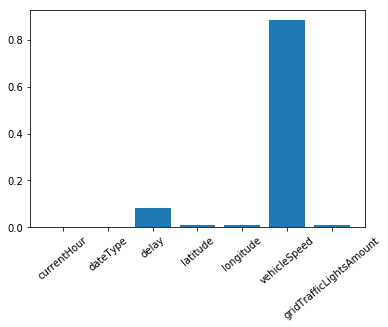

In [0]:
import matplotlib.pyplot as plt

importances = model.stages[1].featureImportances
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, features_with_traffic_lights, rotation=40)
plt.show()